In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the CSV file

df = pd.read_csv('brain_stroke.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
df.shape

(4981, 11)

In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [7]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


In [8]:
# Checking unique values

uni = df.nunique()

pd.DataFrame(uni, columns=['Unique Values'])

,Unique Values
gender,2
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,4
Residence_type,2
avg_glucose_level,3895
bmi,342
smoking_status,4


In [9]:
df.isnull()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4976,False,False,False,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
cat_features = df.select_dtypes(exclude="number").columns
num_cols = df.select_dtypes(include="number").columns
print('Categorical Features are: ', cat_features)
print('Numerical Features are: ', num_cols)

Categorical Features are:  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
Numerical Features are:  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')


 There are no null values

In [12]:
print('Data before dropping duplicates:', df.shape)

df = df.drop_duplicates()

print('Data after dropping duplicates:', df.shape)

Data before dropping duplicates: (4981, 11)
Data after dropping duplicates: (4981, 11)


 There are no duplicate values

## Data Analysis

### Converting BMI into Categorical Data


    1) under 18.5 = underweight
    2) between 18.5 and 24.9 = healthy
    3) between 25 and 29.9 = overweight
    4) between 30 and 39.9 = obese
    5) above 39.9 = extreme obese


In [13]:
df['bmi_categorical'] = pd.cut(df['bmi'],
                               bins=[0,18.4,24.9,29.9,39.9,49.9],
                            labels = ['underweight','healthy','overweight','obese','extreme obese'])

In [14]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_categorical
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,obese
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,obese
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,obese
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,healthy
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,overweight


## Starting with EDA

stroke
0    4733
1     248
Name: stroke, dtype: int64


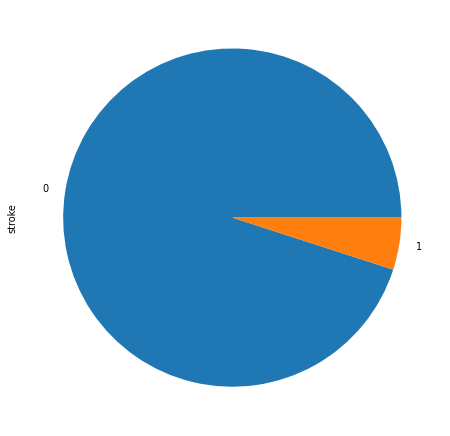

In [15]:
print(df.groupby('stroke')['stroke'].count())

plt.figure(figsize = (8,8), dpi = 70)

df.groupby('stroke')['stroke'].count().plot(kind = 'pie');

Dataset is imbalanced

## Continuos Variable Analysis

In [16]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


In [17]:
corrdf = df[['age', 'avg_glucose_level', 'bmi','stroke']]

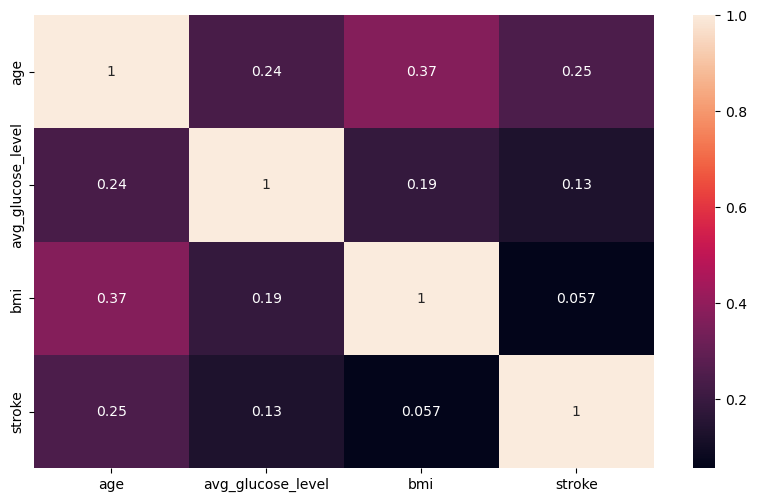

In [18]:
plt.figure(figsize=(10,6), dpi = 100)
sns.heatmap(corrdf.corr(), annot = True);

As we can see, there are no high features for correlation

In [19]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

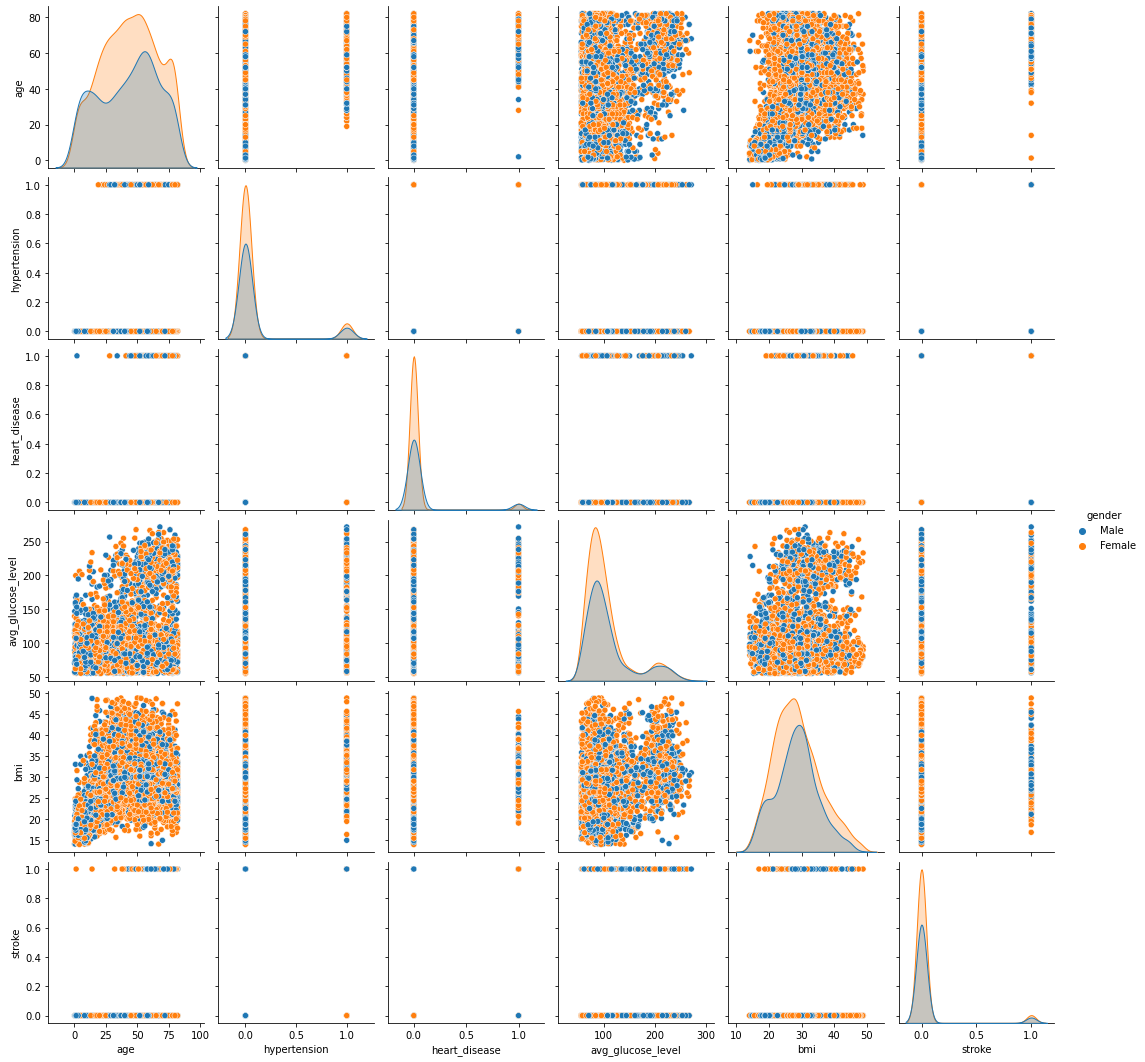

In [20]:
sns.pairplot(df, hue = 'gender')

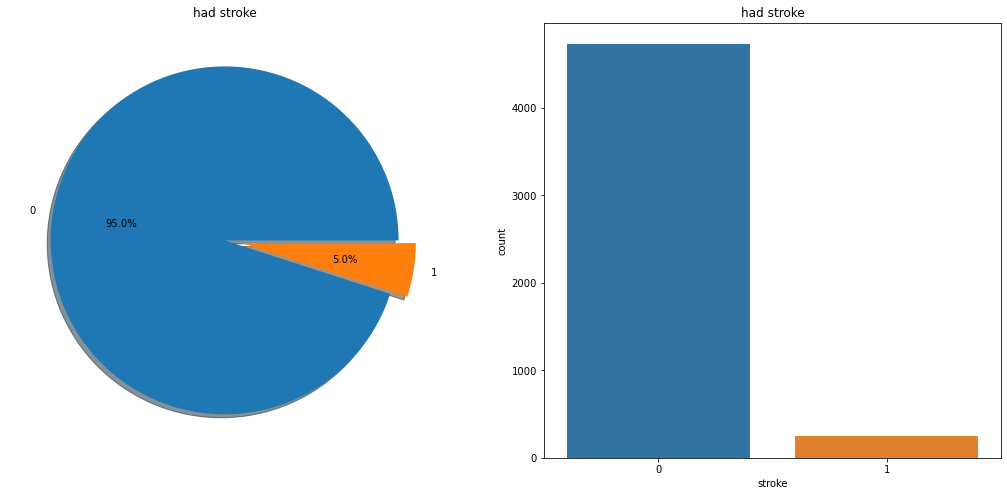

In [21]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
df['stroke'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow=True)
ax[0].set_title('had stroke')
ax[0].set_ylabel('')
sns.countplot(df, x = 'stroke')
ax[1].set_title('had stroke')
plt.show()



As we can see that from the above plot, its a class imbalancing problem. The number of people who actually had a stroke are very less in our dataset. We'll use oversampling technique to deal with this.


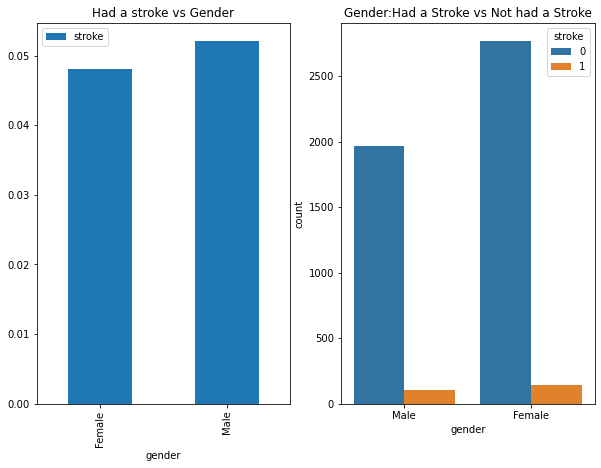

In [22]:
f,ax=plt.subplots(1,2,figsize=(10,7))
df[['gender','stroke']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Had a stroke vs Gender')
sns.countplot(x = 'gender',hue='stroke',data=df,ax=ax[1])
ax[1].set_title('Gender:Had a Stroke vs Not had a Stroke')
plt.show()

In [23]:
cat_cols = cat_features[:-1]
for col in cat_cols:
    print(f'============{col}============\n {df[col].value_counts()}\n')

============gender============
 Female    2907
Male      2074
Name: gender, dtype: int64

============ever_married============
 Yes    3280
No     1701
Name: ever_married, dtype: int64

============work_type============
 Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

============Residence_type============
 Urban    2532
Rural    2449
Name: Residence_type, dtype: int64



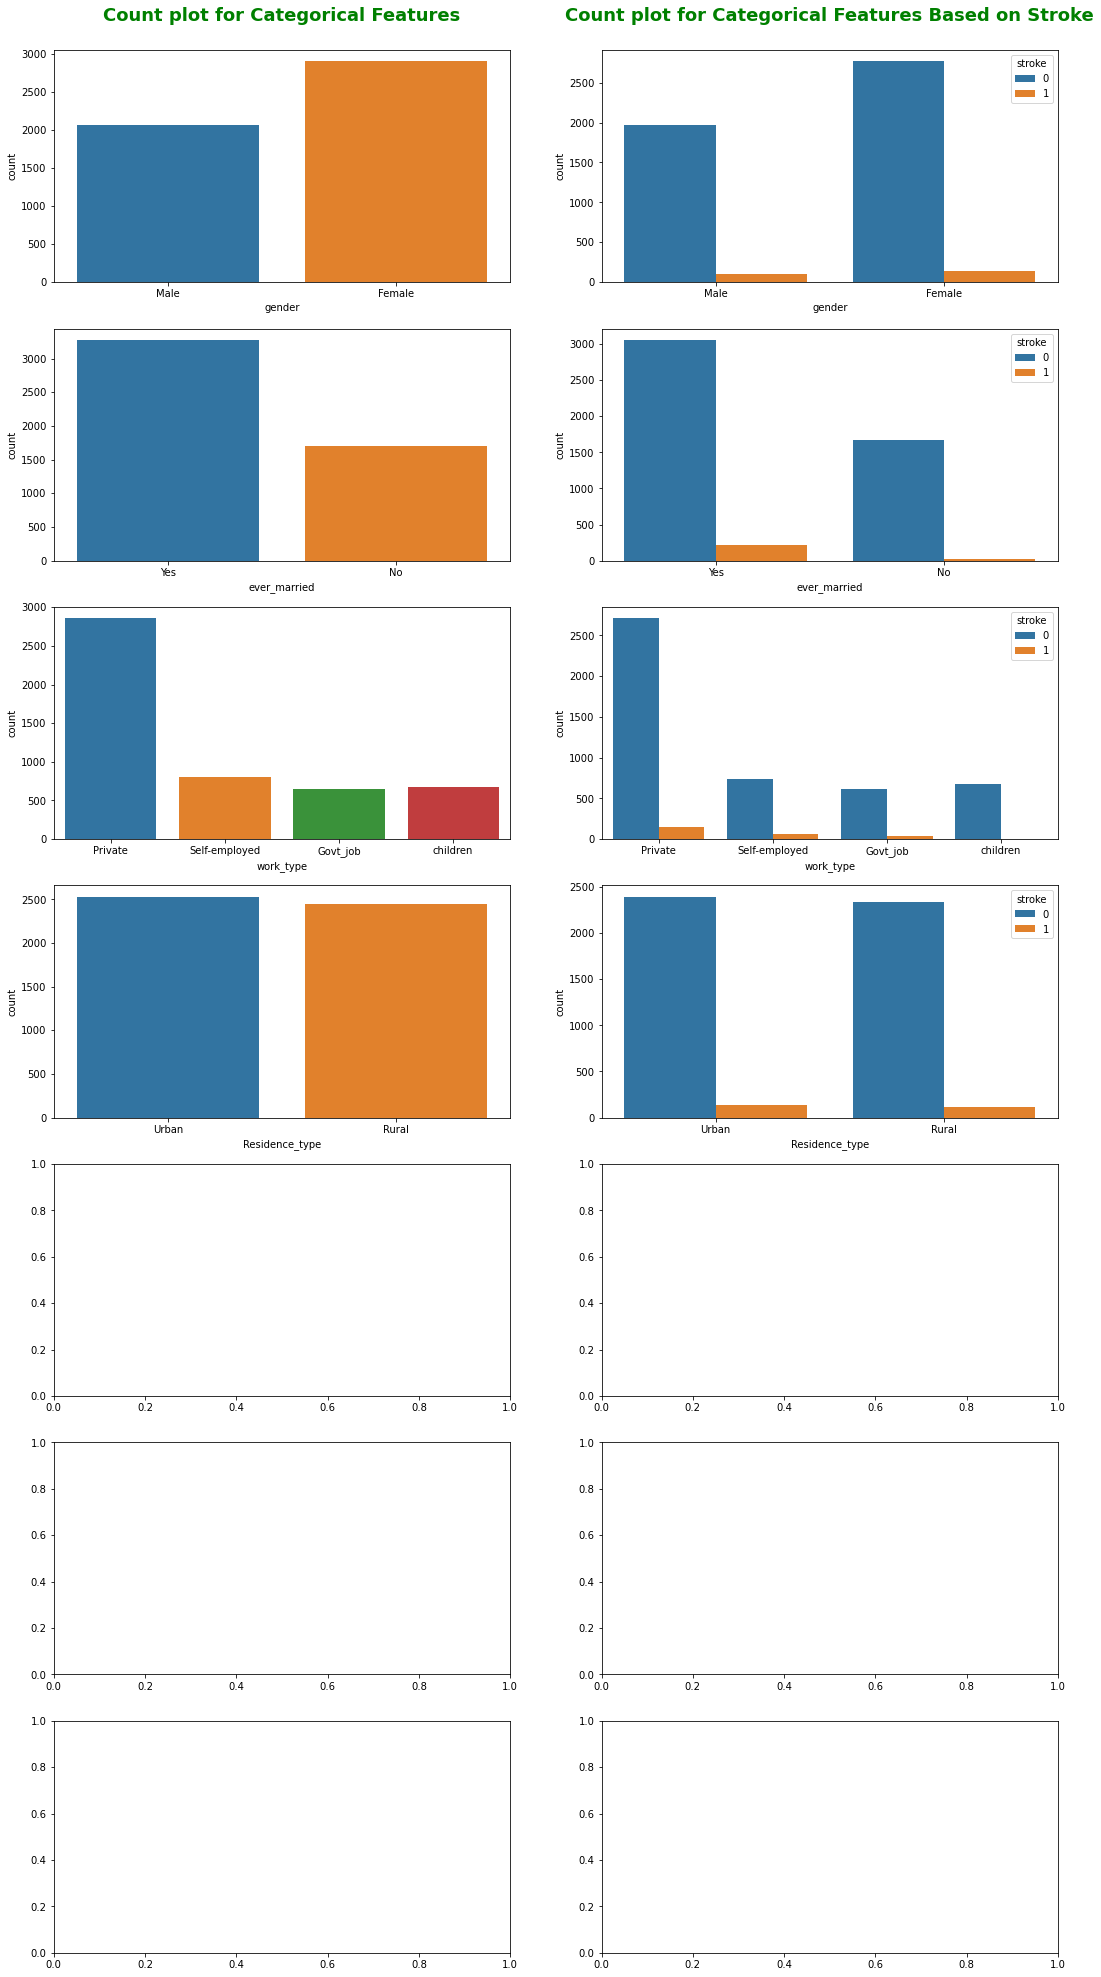

In [24]:
fig,ax = plt.subplots(7,2,figsize=(18,35))
for i, col in enumerate(cat_cols):
    sns.countplot(data = df, x = col, ax=ax[i,0])
    sns.countplot(data = df, x = col,hue='stroke', ax=ax[i,1])
    if i == 0:
        ax[0,0].set_title('Count plot for Categorical Features', loc='center', y=1.1, 
                          size=18, weight='bold',color='green')
    else:
        ax[0,1].set_title('Count plot for Categorical Features Based on Stroke', loc='center', y=1.1, size=18, 
                          weight='bold',color='green')



Insights:

    Married people have more strokes as compared to unmarried.
    Never smoked people have more strokes as compared to formerly smoked or smokes.
    Urban people have more strokes as compared to people living in rural areas.



In [25]:
lst_num = []
lst_cate = ['hypertension', 'heart_disease']
#These are the categorical variables but types are continuous variables

In [26]:
lst_num = []
for i in df.columns:
    if(i != 'stroke' and df[i].dtypes != 'O' and i not in lst_cate):
        lst_num.append(i)

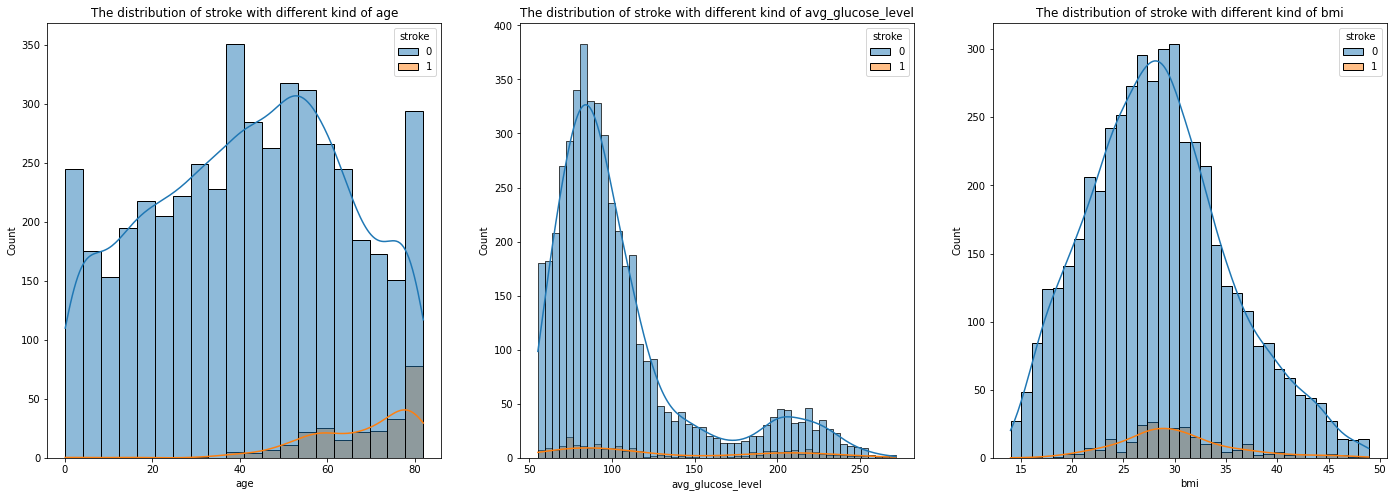

In [27]:
idx = 0
fig, axs = plt.subplots(1, 3, figsize=(24,8))
for i in range(3):
    sns.histplot(ax=axs[i], data=df, x=lst_num[idx], hue='stroke', kde=True)
    axs[i].set_title('The distribution of stroke with different kind of ' + lst_num[idx])
    idx += 1



Allow me to do inferential analytics so the conclusion of important features can be made

    #------------------------------------------Chi Square Test-------------------------------------------------------#

    H0: lst_0 and lst_1 are DEPENDENT

    Ha: lst0 and lst_1 are INDEPENDENT

    #-------------------------------------

In [31]:
alpha = .05
for i in lst_cate:
    table = pd.crosstab(df[i], df['stroke'])
    stat, p, dof, expected = chi2_contingency(table)
#--------------------------------------------------------------------------------
    print(f'p-value = {p:.2f}, alpha = {alpha:.2f}')
    if (p < alpha):
        print('p < alpha => reject H0 => ', i, 'and stroke are DEPENDENT')
    else:
        print('p > alpha => FAILED to reject H0 =>', i, 'and stroke are INDEPENDENT')
    print('\n')

p-value = 0.00, alpha = 0.05
p < alpha => reject H0 =>  hypertension and stroke are DEPENDENT


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 =>  heart_disease and stroke are DEPENDENT






Most of features are reject H0 meaning they affected to the stroke condition

Except for residence_type and gender failed to reject H0 meaning they have no affection to stroke condition

I remove them from the dataset


In [33]:
final_df = df.drop(['Residence_type', 'gender'], axis = 1)

In [34]:
label_encoder = LabelEncoder()

final_df['ever_married'] = label_encoder.fit_transform(final_df['ever_married'])

In [35]:
final_df = pd.get_dummies(final_df, drop_first=True)
final_df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_categorical_healthy,bmi_categorical_overweight,bmi_categorical_obese,bmi_categorical_extreme obese
0,67.0,0,1,1,228.69,36.6,1,1,0,0,1,0,0,0,0,1,0
1,80.0,0,1,1,105.92,32.5,1,1,0,0,0,1,0,0,0,1,0
2,49.0,0,0,1,171.23,34.4,1,1,0,0,0,0,1,0,0,1,0
3,79.0,1,0,1,174.12,24.0,1,0,1,0,0,1,0,1,0,0,0
4,81.0,0,0,1,186.21,29.0,1,1,0,0,1,0,0,0,1,0,0


## Model Detection

In [29]:
from scipy.stats import ttest_ind, chi2_contingency, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import time
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

C:\Users\kulka\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [36]:
final_df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_categorical_healthy,bmi_categorical_overweight,bmi_categorical_obese,bmi_categorical_extreme obese
0,67.0,0,1,1,228.69,36.6,1,1,0,0,1,0,0,0,0,1,0
1,80.0,0,1,1,105.92,32.5,1,1,0,0,0,1,0,0,0,1,0
2,49.0,0,0,1,171.23,34.4,1,1,0,0,0,0,1,0,0,1,0
3,79.0,1,0,1,174.12,24.0,1,0,1,0,0,1,0,1,0,0,0
4,81.0,0,0,1,186.21,29.0,1,1,0,0,1,0,0,0,1,0,0


In [38]:
X = final_df.drop('stroke', axis = 1)
y = df['stroke']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
label_yes_before = y_train.where(y_train == 1).count()
label_no_before = y_train.where(y_train == 0).count()
print('label yes before:', label_yes_before)
print('label no before:', label_no_before)

label yes before: 173
label no before: 3313


In [41]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [42]:
label_yes_after = y_train.where(y_train == 1).count()
label_no_after = y_train.where(y_train == 0).count()
print('label yes after:', label_yes_after)
print('label no after:', label_no_after)

label yes after: 3313
label no after: 3313


In [43]:
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)

In [44]:
models= [LogisticRegression(), GaussianNB(), KNeighborsClassifier(n_neighbors=11), 
         RandomForestClassifier(), DecisionTreeClassifier(), XGBClassifier(), SVC()]
scores= []
test_score_accuracy = []
test_score_recall = []
test_score_precision = []
train_times = []
names= []

In [45]:
for model in models:
    start= time.time()
    scores.append(cross_val_score(model, X_train, y_train, scoring= 'accuracy', cv= 10).mean())
    end = time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)

df= pd.DataFrame(scores, columns=['Score_Test'], index= range(len(models)))
df.insert(1, 'Time_Train', pd.Series(train_times))
df.insert(0, 'Model', pd.Series(names))
df

C:\Users\kulka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kulka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kulka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kulka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kulka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kulka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kulka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kulka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kulka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kulka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Score_Test,Time_Train
0,LogisticRegression,0.773467,0.734788
1,GaussianNB,0.723965,0.027995
2,KNeighborsClassifier,0.895564,0.975731
3,RandomForestClassifier,0.992152,3.797168
4,DecisionTreeClassifier,0.976758,0.120044
5,XGBClassifier,0.978269,2.635501
6,SVC,0.829911,11.040259


In [46]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_acc = accuracy_score(y_test, y_pred)
    score_recall = recall_score(y_test, y_pred)
    score_precision = precision_score(y_test, y_pred)
    #------------------------------------------------
    test_score_accuracy.append(score_acc)
    test_score_recall.append(score_recall)
    test_score_precision.append(score_precision)
    cm = classification_report(y_test, y_pred)
    print(model.__class__.__name__)
    print(cm, '\n')
df['Test_Score_Accuracy'] = test_score_accuracy
df['Test_Score_Recall'] = test_score_recall
df['Test_Score_Precision'] = test_score_precision
df

LogisticRegression
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1420
           1       0.14      0.87      0.25        75

    accuracy                           0.73      1495
   macro avg       0.57      0.80      0.54      1495
weighted avg       0.95      0.73      0.81      1495
 

GaussianNB
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      1420
           1       0.10      0.85      0.18        75

    accuracy                           0.61      1495
   macro avg       0.54      0.72      0.46      1495
weighted avg       0.94      0.61      0.71      1495
 

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1420
           1       0.12      0.53      0.20        75

    accuracy                           0.78      1495
   macro avg       0.55      0.67      0.54      1495
weighted avg       

C:\Users\kulka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1420
           1       0.15      0.16      0.16        75

    accuracy                           0.91      1495
   macro avg       0.55      0.56      0.56      1495
weighted avg       0.92      0.91      0.91      1495
 

SVC
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1420
           1       0.12      0.64      0.20        75

    accuracy                           0.75      1495
   macro avg       0.55      0.70      0.53      1495
weighted avg       0.93      0.75      0.82      1495
 



,Model,Score_Test,Time_Train,Test_Score_Accuracy,Test_Score_Recall,Test_Score_Precision
0,LogisticRegression,0.773467,0.734788,0.733779,0.866667,0.143488
1,GaussianNB,0.723965,0.027995,0.605351,0.853333,0.099533
2,KNeighborsClassifier,0.895564,0.975731,0.783946,0.533333,0.121951
3,RandomForestClassifier,0.992152,3.797168,0.936455,0.053333,0.142857
4,DecisionTreeClassifier,0.976758,0.120044,0.913712,0.066667,0.078125
5,XGBClassifier,0.978269,2.635501,0.913712,0.160000,0.153846
6,SVC,0.829911,11.040259,0.747157,0.640000,0.120301


The model should focus on the error type II (the person who really have stroke but the model failed to detect stroke). So I will choose model has high score in recall for class 1(stroke)

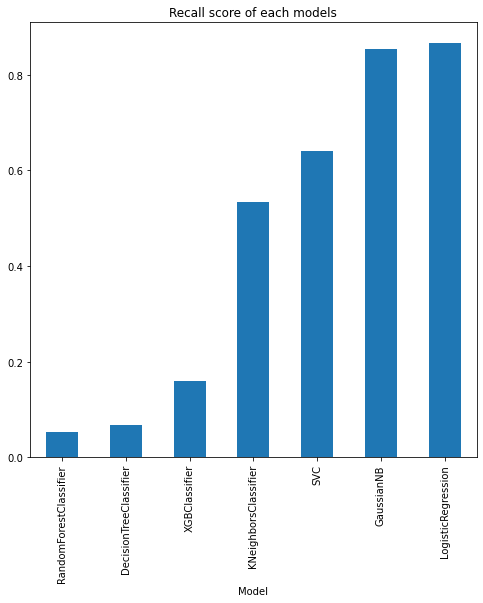

In [47]:
plt.figure(figsize=(8,8))
data=df.groupby(['Model'])['Test_Score_Recall'].mean().sort_values().plot(kind='bar')
plt.title('Recall score of each models')
plt.show()

GaussianNB is the suitable model for the stroke detection from here

## CONCLUSION

The model is used for prediction or classification in health issues, it should only act as the support for the expert to reduce the workloads, not safe and accurate enough yet to use automatically without human intervention.